In [1]:
import warnings
warnings.filterwarnings('ignore')

I did torch upgrade because model was taking too long time to process the request so rectified the issue

In [2]:
pip install torch --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.0 MB/s eta 0:00:00


In [3]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.9/36.9 MB 219.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 207.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 150.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 204.5 MB/s eta 0:00:00


In [4]:
!pip install huggingface_hub -q


In [5]:
import pandas as pd
import json


In [6]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the dataset - Print the overview of the data (first few rows, shape, etc)


In [7]:
ticket = pd.read_csv('/content/drive/My Drive/Support_ticket_text_data_mid_term (1).csv')
ticket.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


In [8]:
print(ticket.shape)


(21, 2)


In [9]:
print(ticket.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   support_tick_id      21 non-null     object
 1   support_ticket_text  21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes
None


 check for missing values in the data

In [10]:
missing_values = ticket.isnull().sum()

# Display the count of missing values for each column
print("Missing values in the data:")
print(missing_values)

Missing values in the data:
support_tick_id        0
support_ticket_text    0
dtype: int64


**Model Building**

Loading the model

In [11]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

In [12]:
model_name_or_path="TheBloke/Llama-2-13b-chat-GGUF"
model_basename="llama-2-13b-chat.Q5_K_M.gguf"
model_path=hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [13]:
lcpp_llm=Llama(
    model_path=model_path,
    n_threads=2,
    n_batch=512,
    n_gpu_layers=43,
    n_ctx=4096
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13b-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

**Defining Model Response Parameters**

In [15]:
def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

**Task 1: Ticket Categorization**


In [ ]:
# create a copy of the data
data_1 = ticket.copy()

In [ ]:
## Complete the prompt to get the desired output

instruction_1 = """
    Categorize the support tickets based on their content and assign appropriate categories.
"""

In [ ]:
data_1['llama_response'] = data_1['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_1,x))


llama_print_timings:        load time =     560.01 ms
llama_print_timings:      sample time =      57.26 ms /    87 runs   (    0.66 ms per token,  1519.52 tokens per second)
llama_print_timings: prompt eval time =     559.69 ms /    94 tokens (    5.95 ms per token,   167.95 tokens per second)
llama_print_timings:        eval time =    3942.06 ms /    86 runs   (   45.84 ms per token,    21.82 tokens per second)
llama_print_timings:       total time =    4852.19 ms /   180 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     560.01 ms
llama_print_timings:      sample time =     287.67 ms /   430 runs   (    0.67 ms per token,  1494.78 tokens per second)
llama_print_timings: prompt eval time =     363.99 ms /    92 tokens (    3.96 ms per token,   252.75 tokens per second)
llama_print_timings:        eval time =   20290.70 ms /   429 runs   (   47.30 ms per token,    21.14 tokens per second)
llama_print_timings:       total time =   22775.09 ms /   521 

In [ ]:
## Write the code to check the first five rows of the data to confirm whether the new column has been added

print(data_1.head())

  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  
0   Sure! Here is the support ticket categorized ...  
1   Sure, I can assist you with categorizing your...  
2   Sure! Based on the content of your support ti...  
3   Sure! Based on the content of your support ti...  
4   Sure! I can certainly assist you in identifyi...  


In [ ]:
def extract_category(model_response):
    if 'technical issues' in model_response.lower():
        return 'Technical issues'
    elif 'hardware issues' in model_response.lower():
        return 'Hardware issues'
    elif 'data recovery' in model_response.lower():
        return 'Data recovery'

In [ ]:
data_1['Category'] = data_1['llama_response'].apply(extract_category)
data_1['Category'].head()

0               None
1    Hardware issues
2      Data recovery
3               None
4    Hardware issues
Name: Category, dtype: object

In [ ]:
final_data_1 = data_1.drop(['llama_response'], axis=1)
final_data_1.head()

,support_tick_id,support_ticket_text,Category
0,ST2023-006,My internet connection has significantly slowe...,None
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware issues
2,ST2023-008,I've accidentally deleted essential work docum...,Data recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,None
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware issues


**Task 2: Ticket Categorization and Returning Structured Output**

In [58]:
# create a copy of the data
data_2 = ticket.copy()

In [74]:
# defining the instructions for the model
instruction_2 = """
    Extract the below information from the dataset based on the content to output JSON with the below headers:

        1.original_text: The content of the support ticket.
        2.category:your_predicted_category from one the following "Technical Issue","Data Recovery","Hardware Issue", if category is unknow assign "Others"

"""

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_sentiment = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_sentiment)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [75]:
data_2['llama_response'] = data_2['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_2,x))


Llama.generate: prefix-match hit

llama_print_timings:        load time =     964.47 ms
llama_print_timings:      sample time =      53.99 ms /    91 runs   (    0.59 ms per token,  1685.37 tokens per second)
llama_print_timings: prompt eval time =     589.09 ms /   155 tokens (    3.80 ms per token,   263.12 tokens per second)
llama_print_timings:        eval time =    5635.66 ms /    90 runs   (   62.62 ms per token,    15.97 tokens per second)
llama_print_timings:       total time =    6521.49 ms /   245 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     964.47 ms
llama_print_timings:      sample time =      58.98 ms /    92 runs   (    0.64 ms per token,  1559.77 tokens per second)
llama_print_timings: prompt eval time =     585.99 ms /   154 tokens (    3.81 ms per token,   262.80 tokens per second)
llama_print_timings:        eval time =    5919.85 ms /    91 runs   (   65.05 ms per token,    15.37 tokens per second)
llama_print_timings:       to

In [76]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added

print(data_2.head())


  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   Sure! Here is the extracted information in JS...   
1   Sure, here is the extracted information in JS...   
2   Sure! Here is the extracted JSON with the req...   
3   Sure! Here is the extracted information from ...   
4   Sure! Here's the extracted data in JSON forma...   

                               llama_response_parsed  
0  {'category': 'Technical Issue', 'issue_descrip...  
1  {'category': 'Hardware Issue', 'issue': 'lapto...  
2  {'category': 'Data Recovery', 'description': '...  
3  {'categ

In [71]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [77]:
data_2['llama_response_parsed'] = data_2['llama_response'].apply(extract_json_data)
data_2['llama_response_parsed']


Error parsing JSON: Extra data: line 6 column 1 (char 149)


0     {'original_text': 'My internet connection has ...
1     {'original_text': 'Urgent help required! My la...
2     {'original_text': 'I've accidentally deleted e...
3     {'original_text': 'Despite being in close prox...
4     {'original_text': 'My smartphone battery is dr...
5     {'original_text': 'I'm locked out of my online...
6     {'original_text': 'My computer's performance i...
7     {'original_text': 'I'm experiencing a recurrin...
8     {'original_text': 'My external hard drive isn'...
9     {'original_text': 'The graphics card in my gam...
10    {'original_text': 'I accidentally formatted my...
11    {'original_text': 'My computer's screen has go...
12    {'original_text': 'I accidentally spilled wate...
13    {'original_text': 'My USB flash drive is physi...
14    {'original_text': 'The touchpad on my laptop h...
15    {'original_text': 'My internet connection is f...
16                                                   {}
17    {'original_text': 'I accidentally formatte

In [78]:
llama_response_parsed_df_2 = pd.json_normalize(data_2['llama_response_parsed'])
llama_response_parsed_df_2.head()

,original_text,category
0,My internet connection has significantly slowe...,Technical Issue
1,Urgent help required! My laptop refuses to sta...,Hardware Issue
2,I've accidentally deleted essential work docum...,Data Recovery
3,Despite being in close proximity to my Wi-Fi r...,Technical Issue
4,"My smartphone battery is draining rapidly, eve...",Hardware Issue


In [79]:
data_with_parsed_model_output_2 = pd.concat([data_2, llama_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,original_text,category
0,ST2023-006,My internet connection has significantly slowe...,Sure! Here is the extracted information in JS...,{'original_text': 'My internet connection has ...,My internet connection has significantly slowe...,Technical Issue
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"Sure, here is the extracted information in JS...",{'original_text': 'Urgent help required! My la...,Urgent help required! My laptop refuses to sta...,Hardware Issue
2,ST2023-008,I've accidentally deleted essential work docum...,Sure! Here is the extracted JSON with the req...,{'original_text': 'I've accidentally deleted e...,I've accidentally deleted essential work docum...,Data Recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Sure! Here is the extracted information from ...,{'original_text': 'Despite being in close prox...,Despite being in close proximity to my Wi-Fi r...,Technical Issue
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Sure! Here's the extracted data in JSON forma...,{'original_text': 'My smartphone battery is dr...,"My smartphone battery is draining rapidly, eve...",Hardware Issue


In [81]:
final_data_2 = data_with_parsed_model_output_2.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_2.head()

,support_tick_id,support_ticket_text,original_text,category
0,ST2023-006,My internet connection has significantly slowe...,My internet connection has significantly slowe...,Technical Issue
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Urgent help required! My laptop refuses to sta...,Hardware Issue
2,ST2023-008,I've accidentally deleted essential work docum...,I've accidentally deleted essential work docum...,Data Recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Despite being in close proximity to my Wi-Fi r...,Technical Issue
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","My smartphone battery is draining rapidly, eve...",Hardware Issue


**Task 3: Ticket Categorization, Creating Tags, and Returning Structured Output**

In [ ]:
# create a copy of the data
data_3 = ticket.copy()

In [ ]:
## Complete the prompt to get the desired output

instruction_3 = """

   Extract the below information from the dataset based on the content to output JSON with the below headers:


    1.original_text: The content of the support ticket.
    2.predicted_category: assign one category from following options, "Technical issues","Hardware Issues","Data Recovery","others" if category is unknown based on the original text
    3.tags: Additional details or keywords extracted from the ticket.

"""

In [ ]:
data_3['llama_response'] = data_3['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_3,x))



llama_print_timings:        load time =     678.12 ms
llama_print_timings:      sample time =      76.92 ms /   116 runs   (    0.66 ms per token,  1508.12 tokens per second)
llama_print_timings: prompt eval time =     677.63 ms /   176 tokens (    3.85 ms per token,   259.73 tokens per second)
llama_print_timings:        eval time =    5457.39 ms /   115 runs   (   47.46 ms per token,    21.07 tokens per second)
llama_print_timings:       total time =    6618.17 ms /   291 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     678.12 ms
llama_print_timings:      sample time =      70.21 ms /   118 runs   (    0.60 ms per token,  1680.67 tokens per second)
llama_print_timings: prompt eval time =     478.97 ms /   174 tokens (    2.75 ms per token,   363.28 tokens per second)
llama_print_timings:        eval time =    5727.06 ms /   117 runs   (   48.95 ms per token,    20.43 tokens per second)
llama_print_timings:       total time =    6633.65 ms /   291 

In [ ]:
data_3['llama_response_parsed'] = data_3['llama_response'].apply(extract_json_data)
data_3['llama_response_parsed'].head(10)

Error parsing JSON: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)


0    {'original_text': 'My internet connection has ...
1    {'original_text': 'Urgent help required! My la...
2    {'original_text': 'I've accidentally deleted e...
3    {'original_text': 'Despite being in close prox...
4    {'original_text': 'My smartphone battery is dr...
5    {'original_text': 'I'm locked out of my online...
6    {'original_text': 'My computer's performance i...
7    {'original_text': 'I'm experiencing a recurrin...
8    {'original_text': 'My external hard drive isn'...
9    {'original_text': 'The graphics card in my gam...
Name: llama_response_parsed, dtype: object

In [ ]:
llama_response_parsed_df_3 = pd.json_normalize(data_3['llama_response_parsed'])
llama_response_parsed_df_3.head(10)

,original_text,predicted_category,tags
0,My internet connection has significantly slowe...,Technical issues,"[internet, connection, slow, disconnections, r..."
1,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[laptop, startup, presentation, hardware, assi..."
2,I've accidentally deleted essential work docum...,Data Recovery,"[data loss, documents, prioritize, data recovery]"
3,Despite being in close proximity to my Wi-Fi r...,Technical issues,"[Wi-Fi, signal strength, troubleshooting]"
4,"My smartphone battery is draining rapidly, eve...",Hardware Issues,"[battery, smartphone, draining, rapidly]"
5,I'm locked out of my online banking account an...,Technical issues,"[password, online banking, urgent, transaction]"
6,"My computer's performance is sluggish, severel...",Hardware Issues,"[performance, optimization, productivity]"
7,I'm experiencing a recurring blue screen error...,Hardware Issues,"[blue screen, crashes, hardware, diagnosis, re..."
8,My external hard drive isn't being recognized ...,Data Recovery,"[hard drive, data recovery, vital data]"
9,The graphics card in my gaming laptop seems to...,Hardware Issues,"[laptop, graphics card, gaming, performance, h..."


In [ ]:
data_with_parsed_model_output_3 = pd.concat([data_3, llama_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,original_text,predicted_category,tags
0,ST2023-006,My internet connection has significantly slowe...,Sure! Here is the extracted information in JS...,{'original_text': 'My internet connection has ...,My internet connection has significantly slowe...,Technical issues,"[internet, connection, slow, disconnections, r..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"Sure, here is the extracted information in JS...",{'original_text': 'Urgent help required! My la...,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[laptop, startup, presentation, hardware, assi..."
2,ST2023-008,I've accidentally deleted essential work docum...,Sure! Here is the extracted information from ...,{'original_text': 'I've accidentally deleted e...,I've accidentally deleted essential work docum...,Data Recovery,"[data loss, documents, prioritize, data recovery]"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Sure! Here is the extracted information from ...,{'original_text': 'Despite being in close prox...,Despite being in close proximity to my Wi-Fi r...,Technical issues,"[Wi-Fi, signal strength, troubleshooting]"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Sure! Here's the extracted data in JSON forma...,{'original_text': 'My smartphone battery is dr...,"My smartphone battery is draining rapidly, eve...",Hardware Issues,"[battery, smartphone, draining, rapidly]"


In [ ]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_3 = data_with_parsed_model_output_3.drop(['llama_response','llama_response_parsed','original_text'], axis=1)
final_data_3.head()

,support_tick_id,support_ticket_text,predicted_category,tags
0,ST2023-006,My internet connection has significantly slowe...,Technical issues,"[internet, connection, slow, disconnections, r..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[laptop, startup, presentation, hardware, assi..."
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[data loss, documents, prioritize, data recovery]"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical issues,"[Wi-Fi, signal strength, troubleshooting]"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issues,"[battery, smartphone, draining, rapidly]"


**Task 4 - Ticket Categorization, Creating Tags, Assigning Priority, and Returning Structured Output**

In [ ]:
# create a copy of the data
data_4 = ticket.copy()

In [ ]:
## Complete the prompt to get the desired output

instruction_4 = """


  Extract the below information from the dataset based on the content to output JSON with the below headers:


    1.original_text: The content of the support ticket.
    2.predicted_category: assign one category from following options, "Technical issues","Hardware Issues","Data Recovery","others" if category is unknown
    3.tags: Additional details or keywords extracted from the ticket.
    4.priority:assign priority from the following options ("High",Medium,"Low")

"""




In [ ]:
data_4['llama_response'] = data_4['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_4, x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     678.12 ms
llama_print_timings:      sample time =      82.18 ms /   120 runs   (    0.68 ms per token,  1460.28 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    5996.98 ms /   120 runs   (   49.97 ms per token,    20.01 tokens per second)
llama_print_timings:       total time =    6571.78 ms /   121 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     678.12 ms
llama_print_timings:      sample time =      69.70 ms /   122 runs   (    0.57 ms per token,  1750.28 tokens per second)
llama_print_timings: prompt eval time =     516.26 ms /   192 tokens (    2.69 ms per token,   371.90 tokens per second)
llama_print_timings:        eval time =    6312.38 ms /   121 runs   (   52.17 ms per token,    19.17 tokens per second)
llama_print_timings:       to

In [ ]:
data_4['llama_response_parsed'] = data_4['llama_response'].apply(extract_json_data)
print(data_4['llama_response_parsed'].head())

0    {'original_text': 'My internet connection has ...
1    {'original_text': 'Urgent help required! My la...
2    {'original_text': 'I've accidentally deleted e...
3    {'original_text': 'Despite being in close prox...
4    {'original_text': 'My smartphone battery is dr...
Name: llama_response_parsed, dtype: object


In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added

print(data_4.head())

  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response llama_response_parsed  
0  \nHere is the output of categorizing and taggi...                    {}  
1  \nHere is the output in JSON format with the r...                    {}  
2  \nCertainly! I can help you with that. Please ...                    {}  
3  \n    Sure! Here's the output of categorizing ...                    {}  
4  \n\nHere's the structured output for each supp...                    {}  


In [ ]:
## Complete the code to apply the extract_json_data function on the llama_response column to create a new column called llama_response_parsed

data_4['llama_response_parsed'] = data_4['llama_response'].apply(extract_json_data)
print(data_4['llama_response_parsed'].head())


0    {'original_text': 'My internet connection has ...
1    {'original_text': 'Urgent help required! My la...
2    {'original_text': 'I've accidentally deleted e...
3    {'original_text': 'Despite being in close prox...
4    {'original_text': 'My smartphone battery is dr...
Name: llama_response_parsed, dtype: object


In [ ]:
## Complete the code to apply the json_normalize on llama_response_parsed variable

llama_response_parsed_df_4 = pd.json_normalize(data_4['llama_response_parsed'])
print(llama_response_parsed_df_4.head())


                                       original_text predicted_category  \
0  My internet connection has significantly slowe...   Technical issues   
1  Urgent help required! My laptop refuses to sta...    Hardware Issues   
2  I've accidentally deleted essential work docum...      Data Recovery   
3  Despite being in close proximity to my Wi-Fi r...   Technical issues   
4  My smartphone battery is draining rapidly, eve...    Hardware Issues   

                                           tags priority  
0  [internet, connection, slow, disconnections]     High  
1     [laptop, startup, presentation, hardware]     High  
2              [data loss, documents, recovery]     High  
3     [Wi-Fi, signal strength, troubleshooting]   Medium  
4               [battery, smartphone, draining]   Medium  


In [ ]:
## Complete the code to concat data_4 and llama_response_parsed_df_4

data_with_parsed_model_output_4 = pd.concat([data_4, llama_response_parsed_df_4], axis=1)
print(data_with_parsed_model_output_4.head())


  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   Sure! Here is the extracted information in JS...   
1   Sure, here is the extracted information in JS...   
2   Sure! Here is the extracted information from ...   
3   Sure! Here is the extracted information from ...   
4   Sure! Here's the extracted data in JSON forma...   

                               llama_response_parsed  \
0  {'original_text': 'My internet connection has ...   
1  {'original_text': 'Urgent help required! My la...   
2  {'original_text': 'I've accidentally deleted e...   
3  {'o

In [ ]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_4 = data_with_parsed_model_output_4.drop(['llama_response', 'llama_response_parsed'], axis=1)
final_data_4.head(10)

,support_tick_id,support_ticket_text,original_text,predicted_category,tags,priority
0,ST2023-006,My internet connection has significantly slowe...,My internet connection has significantly slowe...,Technical issues,"[internet, connection, slow, disconnections]",High
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[laptop, startup, presentation, hardware]",High
2,ST2023-008,I've accidentally deleted essential work docum...,I've accidentally deleted essential work docum...,Data Recovery,"[data loss, documents, recovery]",High
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Despite being in close proximity to my Wi-Fi r...,Technical issues,"[Wi-Fi, signal strength, troubleshooting]",Medium
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","My smartphone battery is draining rapidly, eve...",Hardware Issues,"[battery, smartphone, draining]",Medium
5,ST2023-011,I'm locked out of my online banking account an...,I'm locked out of my online banking account an...,Technical issues,"[password, online banking, urgent]",High
6,ST2023-012,"My computer's performance is sluggish, severel...","My computer's performance is sluggish, severel...",Technical issues,"[performance, optimization, productivity]",High
7,ST2023-013,I'm experiencing a recurring blue screen error...,I'm experiencing a recurring blue screen error...,Hardware Issues,"[blue screen, crashes, hardware, diagnosis]",High
8,ST2023-014,My external hard drive isn't being recognized ...,My external hard drive isn't being recognized ...,Data Recovery,"[hard drive, data recovery, vital data]",High
9,ST2023-015,The graphics card in my gaming laptop seems to...,The graphics card in my gaming laptop seems to...,Hardware Issues,"[Graphics Card, Gaming Laptop, Malfunctioning,...",High


**Task 5 - Ticket Categorization, Creating Tags, Assigning Priority, Assigning ETA, and Returning Structured Output**

In [ ]:
# create a copy of the data
data_5 = ticket.copy()

In [ ]:
## Complete the prompt to get the desired output

instruction_5 = """



  Extract the below information from the dataset based on the content to output JSON with the below headers:

    1.predicted_category: assign one category from following options, "Technical issues","Hardware Issues","Data Recovery","others" if category is unknown
    2.tags: Additional details or keywords extracted from the ticket.
    3.priority:assign priority from the following options ("High",Medium,"Low")
    4.ETA:your predicted eta


"""

In [ ]:
# complete the code to create a new column llama_response'
# by applying the generate_llama_response function to each ticket in the 'support_ticket_text' column of the DataFrame 'data_5'
data_5['llama_response'] = data_5['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_5, x))
print(data_5.head())


Llama.generate: prefix-match hit

llama_print_timings:        load time =     723.08 ms
llama_print_timings:      sample time =     171.41 ms /   239 runs   (    0.72 ms per token,  1394.31 tokens per second)
llama_print_timings: prompt eval time =     618.77 ms /   190 tokens (    3.26 ms per token,   307.06 tokens per second)
llama_print_timings:        eval time =   15662.14 ms /   238 runs   (   65.81 ms per token,    15.20 tokens per second)
llama_print_timings:       total time =   17319.34 ms /   428 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     723.08 ms
llama_print_timings:      sample time =     126.66 ms /   167 runs   (    0.76 ms per token,  1318.49 tokens per second)
llama_print_timings: prompt eval time =     602.54 ms /   189 tokens (    3.19 ms per token,   313.67 tokens per second)
llama_print_timings:        eval time =   10811.42 ms /   166 runs   (   65.13 ms per token,    15.35 tokens per second)
llama_print_timings:       to

  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  
0   Sure! Here is the extracted information in JS...  
1  2. predicted_category: Hardware Issues\n    3....  
2   Sure! Here is the extracted information in JS...  
3   Sure! Here is the extracted information from ...  
4   Sure! Here's the extracted data in JSON forma...  


In [ ]:
## Complete the code to apply the extract_json_data function on the llama_response column to create a new column called llama_response_parsed
data_5['llama_response_parsed'] = data_5['llama_response'].apply(extract_json_data)
print(data_5['llama_response_parsed'].head())


0    {'original_text': 'My internet connection has ...
1    {'original_text': 'Urgent help required! My la...
2    {'original_text': 'I've accidentally deleted e...
3    {'original_text': 'Despite being in close prox...
4    {'original_text': 'My smartphone battery is dr...
Name: llama_response_parsed, dtype: object


In [ ]:
## Complete the code to apply the json_normalize on llama_response_parsed variable
llama_response_parsed_df_5 = pd.json_normalize(data_5['llama_response_parsed'])
print(llama_response_parsed_df_5.head())


                                       original_text predicted_category  \
0  My internet connection has significantly slowe...   Technical issues   
1  Urgent help required! My laptop refuses to sta...    Hardware Issues   
2  I've accidentally deleted essential work docum...      Data Recovery   
3  Despite being in close proximity to my Wi-Fi r...   Technical issues   
4  My smartphone battery is draining rapidly, eve...    Hardware Issues   

                                           tags priority  \
0  [internet, connection, slow, disconnections]     High   
1     [laptop, startup, presentation, hardware]     High   
2               [data loss, deletion, recovery]     High   
3     [Wi-Fi, signal strength, troubleshooting]     High   
4               [battery, smartphone, draining]   Medium   

                            ETA  eta  
0                          ASAP  NaN  
1                     Immediate  NaN  
2  Immediate attention required  NaN  
3                     Immediate 

In [ ]:
## Complete the code to concat data_5 and llama_response_parsed_df_5
data_with_parsed_model_output_5 = pd.concat([data_5, llama_response_parsed_df_5], axis=1)
print(data_with_parsed_model_output_5.head())


  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   Sure! Here is the extracted information from ...   
1   Sure, here is the extracted information in JS...   
2   Sure! Here is the extracted information from ...   
3   Sure! Here is the extracted information from ...   
4   Sure! Here's the extracted data in JSON forma...   

                               llama_response_parsed  \
0  {'original_text': 'My internet connection has ...   
1  {'original_text': 'Urgent help required! My la...   
2  {'original_text': 'I've accidentally deleted e...   
3  {'o

In [ ]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_5 = data_with_parsed_model_output_5.drop(['llama_response', 'llama_response_parsed',"eta","original_text"], axis=1)
print(final_data_5.head())


  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

  predicted_category                                          tags priority  \
0   Technical issues  [internet, connection, slow, disconnections]     High   
1    Hardware Issues     [laptop, startup, presentation, hardware]     High   
2      Data Recovery               [data loss, deletion, recovery]     High   
3   Technical issues     [Wi-Fi, signal strength, troubleshooting]     High   
4    Hardware Issues               [battery, smartphone, draining]   Medium   

                            ETA  
0                          ASAP  
1                     Im

In [ ]:
from tabulate import tabulate
def truncate_text(text, max_length=80):
    return (text[:max_length] + '..') if len(text) > max_length else text

# Truncate long text in the DataFrame
final_data_5['support_ticket_text'] = final_data_5['support_ticket_text'].apply(truncate_text)

# Convert the DataFrame to a list of lists
table_data = final_data_5.values.tolist()

# Get the column headers
headers = final_data_5.columns.tolist()

# Print the table using tabulate
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+-------------------+------------------------------------------------------+----------------------+---------------------------------------------------------------------------------+------------+------------------------------------------------------------------------+
| support_tick_id   | support_ticket_text                                  | predicted_category   | tags                                                                            | priority   | ETA                                                                    |
+===================+======================================================+======================+=================================================================================+============+========================================================================+
| ST2023-006        | My internet connection has significantly slowed do.. | Technical issues     | ['internet', 'connection', 'slow', 'disconnections']                            | High       | A

Task 6 - Ticket Categorization, Creating Tags, Assigning Priority, Assigning ETA, Creating a Draft Response, and Returning Structured Output

In [18]:
# create a copy of the data
data_6 = ticket.copy()

In [36]:
instruction_6 = """


  Extract the below information from the dataset based on the content to output a valid JSON  with the below headers:

    1.original_text:The content of the support ticket
    2.predicted_category: assign one category from following options, "Technical Issues","Hardware Issues","Data Recovery","others" if category is unknown
    3.tags: Additional details or keywords extracted from the ticket.
    4.priority:assign priority from the following options ("High",Medium,"Low")
    5.ETA:your predicted eta
    5.draft response:draft response

"""


In [40]:
# complete the code to create a new column llama_response'
data_6['llama_response'] = data_6['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_6, x))


Llama.generate: prefix-match hit

llama_print_timings:        load time =     964.47 ms
llama_print_timings:      sample time =     120.64 ms /   197 runs   (    0.61 ms per token,  1632.90 tokens per second)
llama_print_timings: prompt eval time =     618.45 ms /   217 tokens (    2.85 ms per token,   350.88 tokens per second)
llama_print_timings:        eval time =   11860.13 ms /   196 runs   (   60.51 ms per token,    16.53 tokens per second)
llama_print_timings:       total time =   13215.61 ms /   413 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     964.47 ms
llama_print_timings:      sample time =     111.31 ms /   187 runs   (    0.60 ms per token,  1679.98 tokens per second)
llama_print_timings: prompt eval time =     622.44 ms /   216 tokens (    2.88 ms per token,   347.02 tokens per second)
llama_print_timings:        eval time =   11836.09 ms /   186 runs   (   63.63 ms per token,    15.71 tokens per second)
llama_print_timings:       to

In [21]:
print(data_6.head())


  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  
0   Sure! Here is the extracted information from ...  
1   Sure, here is the extracted information from ...  
2   Sure! Here is the extracted information from ...  
3   Sure! Here is the extracted information from ...  
4   Sure! Here's the extracted data in JSON forma...  


In [41]:
## Complete the code to apply the extract_json_data function on the llama_response column to create a new column called llama_response_parsed
data_6['llama_response_parsed'] = data_6['llama_response'].apply(extract_json_data)
print(data_6['llama_response_parsed'].head())


    2. predicted_category: Technical Issues
    3. tags: Online Banking, Password Reset, Urgent Transaction
    4. priority: High
    5. ETA: Immediate Assistance Required (No ETA available)
    5. draft response: "Apologies for the inconvenience! We understand the urgency of your request. Our technical team is ready to assist you with resetting your password. Please provide us with your username or account number so we can verify your identity and assist you further."
0    {'original_text': 'My internet connection has ...
1    {'original_text': 'Urgent help required! My la...
2    {'original_text': 'I've accidentally deleted e...
3    {'original_text': 'Despite being in close prox...
4    {'original_text': 'My smartphone battery is dr...
Name: llama_response_parsed, dtype: object


In [83]:
## Complete the code to apply the normalize on llama_response_parsed variable
llama_response_parsed_df_6 = pd.json_normalize(data_6['llama_response_parsed'])
llama_response_parsed_df_6.head()

,original_text,predicted_category,tags,priority,ETA,draft_response,eta
0,My internet connection has significantly slowe...,Technical Issues,"[internet, connection, slow, disconnections]",High,ASAP,We apologize for the inconvenience caused by y...,NaN
1,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[laptop, startup, presentation, hardware]",High,Immediate,We apologize for the inconvenience you are fac...,NaN
2,I've accidentally deleted essential work docum...,Data Recovery,"[data loss, deletion, recovery]",High,Immediate attention required,We apologize for any inconvenience caused by t...,NaN
3,Despite being in close proximity to my Wi-Fi r...,Technical Issues,"[Wi-Fi, signal strength, troubleshooting]",High,24 hours,Thank you for reaching out with your technical...,NaN
4,"My smartphone battery is draining rapidly, eve...",Hardware Issues,"[battery, smartphone, draining]",Medium,2-3 business days,Thank you for reaching out to us regarding you...,NaN


In [43]:
## Complete the code to concat data_6 and llama_response_parsed_df_6
data_with_parsed_model_output_6 = pd.concat([data_6, llama_response_parsed_df_6], axis=1)
print(data_with_parsed_model_output_6.head())


  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   Sure! Here is the extracted information from ...   
1   Sure, here is the extracted information in JS...   
2   Sure! Here is the extracted information from ...   
3   Sure! Here is the extracted information from ...   
4   Sure! Here's the extracted data in JSON forma...   

                               llama_response_parsed  \
0  {'original_text': 'My internet connection has ...   
1  {'original_text': 'Urgent help required! My la...   
2  {'original_text': 'I've accidentally deleted e...   
3  {'o

In [56]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_6 = data_with_parsed_model_output_6.drop(['llama_response', 'llama_response_parsed','eta'], axis=1)
final_data_6.head()

,support_tick_id,support_ticket_text,original_text,predicted_category,tags,priority,ETA,draft_response
0,ST2023-006,My internet connection has significantly slowe...,My internet connection has significantly slowe...,Technical Issues,"[internet, connection, slow, disconnections]",High,ASAP,We apologize for the inconvenience caused by y...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[laptop, startup, presentation, hardware]",High,Immediate,We apologize for the inconvenience you are fac...
2,ST2023-008,I've accidentally deleted essential work docum...,I've accidentally deleted essential work docum...,Data Recovery,"[data loss, deletion, recovery]",High,Immediate attention required,We apologize for any inconvenience caused by t...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Despite being in close proximity to my Wi-Fi r...,Technical Issues,"[Wi-Fi, signal strength, troubleshooting]",High,24 hours,Thank you for reaching out with your technical...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","My smartphone battery is draining rapidly, eve...",Hardware Issues,"[battery, smartphone, draining]",Medium,2-3 business days,Thank you for reaching out to us regarding you...


**Model Output Analysis**


In [48]:
# creating a copy of the dataframe
final_data = final_data_6.copy()

In [49]:
  # complete the code to check the distribution of categories
final_data['predicted_category'].value_counts()


Technical Issues    7
Hardware Issues     6
Data Recovery       6
Name: predicted_category, dtype: int64

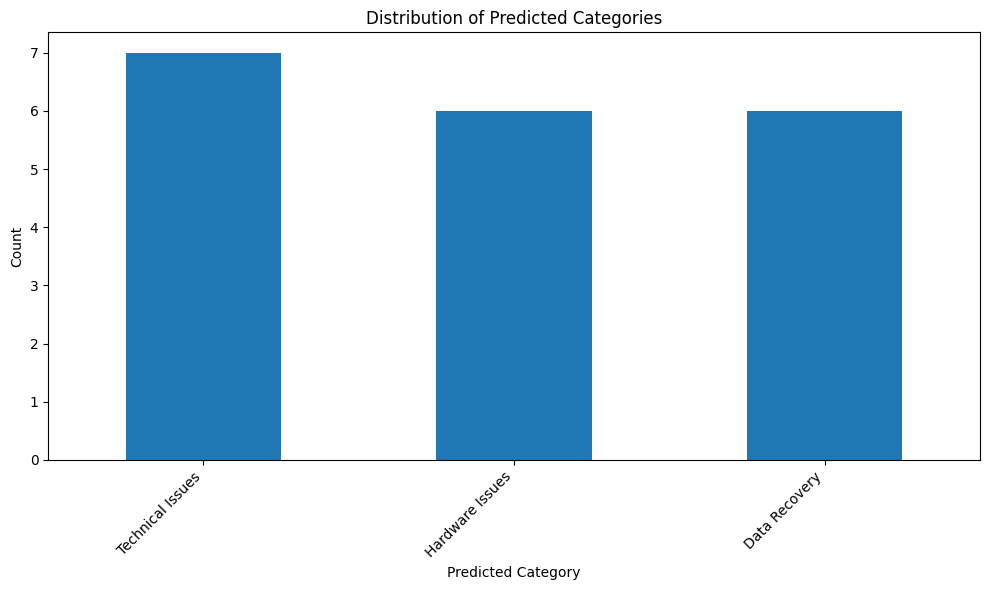

In [50]:
import matplotlib.pyplot as plt

# Count the occurrences of each predicted category
category_counts = final_data['predicted_category'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')  # Plot a bar graph
plt.title('Distribution of Predicted Categories')  # Set the title of the plot
plt.xlabel('Predicted Category')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

In [ ]:
# complete the code to check the distribution of priority
final_data['priority'].value_counts()


High      17
Medium     2
Name: priority, dtype: int64

In [ ]:
final_data['ETA'].value_counts()  # complete the code to check the distribution of ETA


2-3 business days                                                      8
ASAP                                                                   4
24 hours                                                               3
Immediate                                                              1
Immediate attention required                                           1
Please provide more details or context to provide an estimated ETA.    1
Name: ETA, dtype: int64

In [51]:
 # complete the code to check the distribution of priority by categories
final_data.groupby(['predicted_category', 'priority']).support_tick_id.count()


predicted_category  priority
Data Recovery       High        6
Hardware Issues     High        4
                    Medium      2
Technical Issues    High        7
Name: support_tick_id, dtype: int64

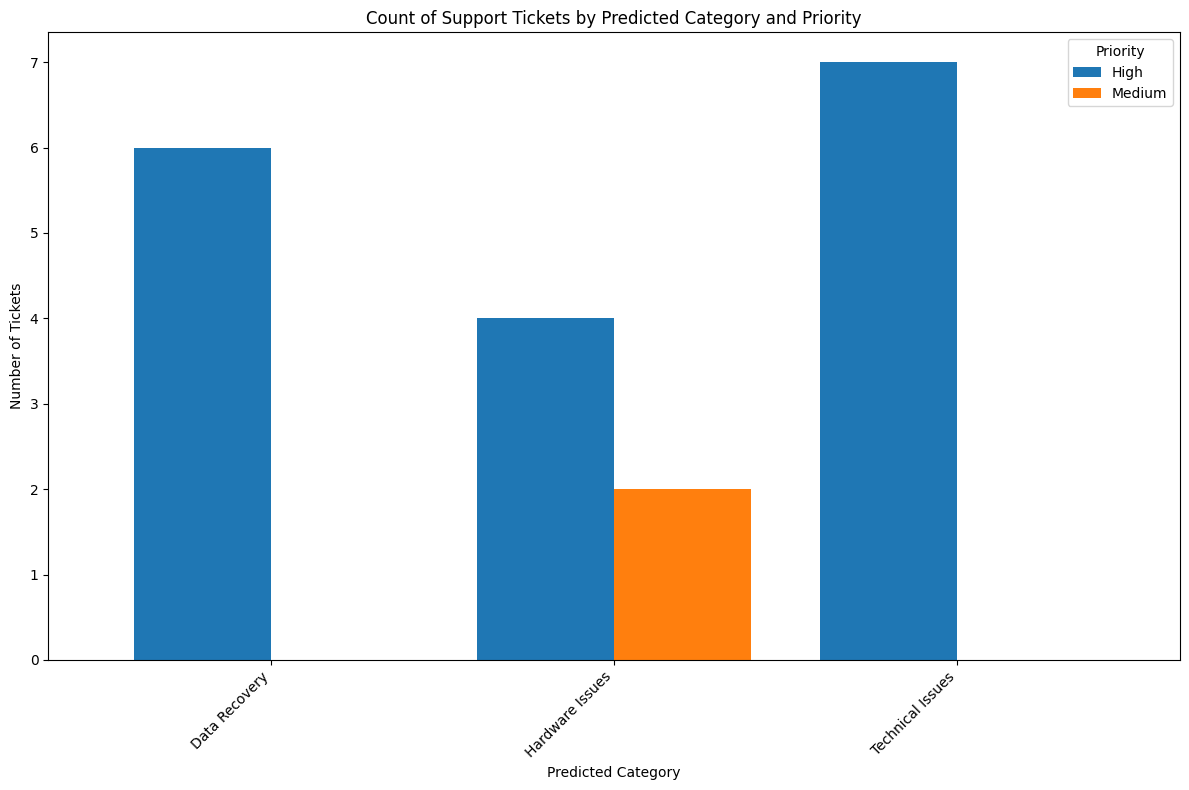

In [52]:
grouped_data = final_data.groupby(['predicted_category', 'priority']).support_tick_id.count().unstack()

# Plot a grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 8), width=0.8)

# Set the title and labels
plt.title('Count of Support Tickets by Predicted Category and Priority')
plt.xlabel('Predicted Category')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')

# Display the legend
plt.legend(title='Priority', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
# complete the code to check the distribution of ETA by categories
final_data.groupby(['predicted_category', 'ETA']).support_tick_id.count()


predicted_category  ETA                                                                
Data Recovery       2-3 business days                                                      4
                    Immediate attention required                                           1
                    Please provide more details or context to provide an estimated ETA.    1
Hardware Issues     2-3 business days                                                      4
                    ASAP                                                                   1
                    Immediate                                                              1
Technical Issues    24 hours                                                               2
                    ASAP                                                                   3
Name: support_tick_id, dtype: int64

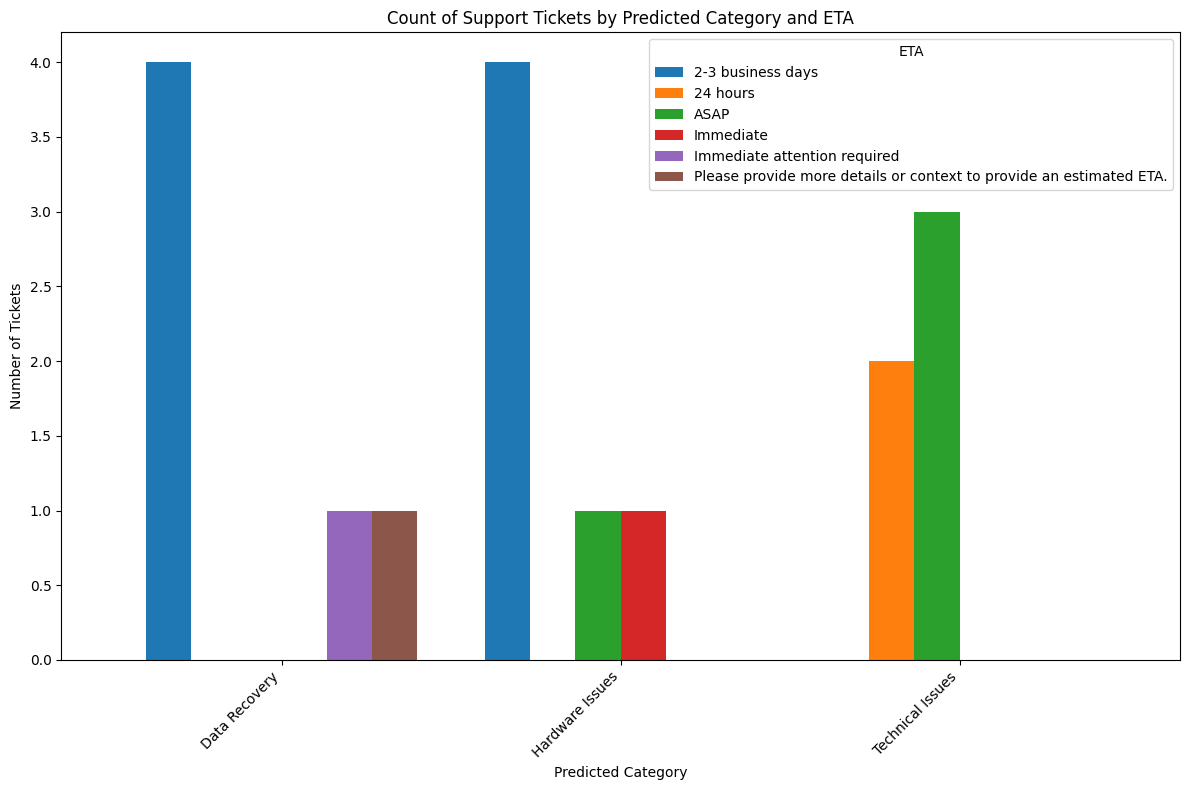

In [54]:
grouped_data = final_data.groupby(['predicted_category', 'ETA']).support_tick_id.count().unstack()

# Plot a grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 8), width=0.8)

# Set the title and labels
plt.title('Count of Support Tickets by Predicted Category and ETA')
plt.xlabel('Predicted Category')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')

# Display the legend
plt.legend(title='ETA', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

**Actionable Insights and Recommendations**


**Actionable Insights**

**Prediction Accuracy:**

The model seems to accurately categorize support tickets into different classes such as Technical Issues, Data Recovery, Hardware Issues, etc.
It also assigns appropriate priorities and estimated time of arrival (ETA) for resolving the issues based on the predicted categories.

**Common Support Issues:**

Common support issues identified include internet connectivity problems, hardware malfunctions (e.g., laptop startup issues, battery drainage), data loss or recovery requests, and software performance issues.

**Urgency of Requests:**

There are several urgent requests marked with high priorities and immediate ETAs, indicating critical issues that require prompt resolution, such as network connectivity problems and hardware failures affecting productivity.

**Variety of Tags:**

Tags associated with each support ticket provide additional context and help in identifying specific keywords or topics mentioned in the tickets, such as internet, hardware, data loss, etc

**Ticket Length:**

Some support tickets contain lengthy descriptions of the issues, which may require text truncation or summarization for better readability and analysis.

**Recommendations**

1. Implement text summarization techniques to condense lengthy support ticket descriptions while retaining essential information. This can improve readability and facilitate faster analysis of support issues.

2. Consider refining the ticket prioritization mechanism based on the urgency and impact of the reported issues. Implement automated rules or algorithms to dynamically adjust priorities based on real-time factors such as service level agreements (SLAs) and customer feedback.

3. Enhance the tagging process by incorporating natural language processing (NLP) techniques to extract additional relevant keywords or entities from support ticket texts. This can improve the accuracy of categorization and enable more granular analysis of support trends.

4. Continuously monitor the performance of the predictive model by tracking key metrics such as prediction accuracy, false positive rate, and model drift. Implement proactive alerting mechanisms to identify any degradation in model performance and trigger retraining or recalibration as needed.

5. Solicit feedback from support agents and end-users regarding the accuracy and effectiveness of the model predictions. Incorporate user feedback into model training and validation processes to iteratively improve model performance and address emerging support challenges.

6. Evaluate the scalability of the model infrastructure to ensure it can handle increasing volumes of support ticket data efficiently. Consider leveraging cloud-based solutions and parallel processing techniques to scale computational resources as needed.





Conclusions:By implementing these recommendations, organizations can enhance the efficiency and effectiveness of their support ticket handling processes, improve customer satisfaction, and optimize resource allocation for resolving support issues in a timely manner.